In [1]:
#!pip install pennylane

In [8]:
#!pip install torch

In [1]:
#1
5**5

3125

In [2]:
#2
str(input()).count('3')

123


1

In [3]:
#3
l = [10, [3, 4], [5, [100, 200, ["MDS"]], 23, 11], 1, 7]
l[3]

1

In [4]:
#4
d = {
    "outer": [
        1,
        2,
        3,
        {"inner": ["this", "is", "inception", {"inner_inner": [1, 2, 3, "MDS"]}]},
    ]
}
d['outer'][3]['inner'][3]['inner_inner'][3]

'MDS'

In [5]:
#5
def website(url):
    domen_name = str(url).split('.')
    return domen_name[1]
website('www.google.com')

'google'

In [6]:
#6
l = [1, 2, 3, 4, 5, 6, 7, 8, 9]
l_2 = [x**2 for x in l]
l_2

[1, 4, 9, 16, 25, 36, 49, 64, 81]

Regresja liniowa - liniowy związek między zmienną zależną (objaśnianą) a zmiennymi niezależnymi (objaśniającymi).
Skala wyników jest dowolna: od -∞ do +∞. 

$f(x)=b_0+b_1x_1+...+b_nx_n$

Regresja logistyczna - współczynniki regresji szacują iloraz szans dla zmiennych niezależnych. Skala wyników od 0 do 1.  
$f(x)=1/(1+e^{-x})=1/(1+e^{-(b_0+b_1x_1+...+b_nx_n)})$

Model regresji liniowej można przedstawić jako rozwiązanie sieci neuronowej bez funkcji aktywacji, gdzie wagi stanowią oszacowania parametrów, parametry to warstwa wejściowa, a wyraz wolny to obciążenie.

$f(x)=b_0+w_1x_1+...w_nx_n$

Natomiast regresja logistyczna ma również funkcję aktywacji (sigmoid pokazany wyżej), która przekształca wartości wejściowe do prawdopodobieństw.

$f(x)=1/(1+e^{-(b_0+w_1x_1+...w_nx_n)}) $

## Kod z cw2 - implementacja regresji w środowisku PyTorch ###

### Regresja liniowa ###

dane: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5]
target: [3.5747122088603307, 4.69696257097214, 5.736676603311067, 6.508357500546753, 7.457161488666202, 8.52844535735018, 9.22832598026873, 10.378557474179432, 11.203350347649776, 11.556161898642621, 13.293541404030345, 14.967301279323014, 14.39359185679979, 16.77898495715852, 16.304374794171068, 18.06958037992911, 19.270994653434162, 19.192870272700397, 21.71514518868846, 22.258068048918336, 23.104096332963614, 23.183489793474582]
epoch: 10, loss = 3.1047
epoch: 20, loss = 2.8161
epoch: 30, loss = 2.5563
epoch: 40, loss = 2.3224
epoch: 50, loss = 2.1119
epoch: 60, loss = 1.9224
epoch: 70, loss = 1.7519
epoch: 80, loss = 1.5983
epoch: 90, loss = 1.4601
epoch: 100, loss = 1.3357


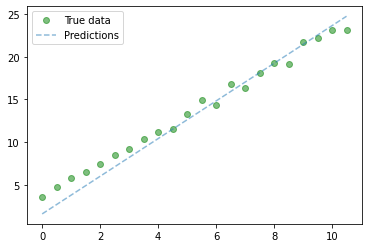

In [45]:
import torch
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out


inputDim = 1
outputDim = 1
learningRate = 0.01
epochs = 100

model = LinearRegression(inputDim, outputDim)

'''
x = np.arange(11)
print(f"dane: {x}")
'''

x = np.arange(0, 11, 0.5)
print(f"dane: {x}")
noise = np.random.uniform(-1, 1, size=len(x)) #dodanie "szumu" z rozkładem jednostajnym

'''
y = [2*el - 1 for el in x]
print(f"target: {y}")
'''
y = [2 * el + 3 + n for el, n in zip(x, noise)] #stochastyczny element
print(f"target: {y}")
# y=2x+3+e

# dostosowanie do pytorch
y  = np.array(y, dtype=np.float32)
x_train = np.array(x, dtype=np.float32)
x_train, y_train = x_train.reshape(-1, 1), y.reshape(-1, 1)

inputs = torch.from_numpy(x_train)
outputs = torch.from_numpy(y_train)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
# petla uczaca 
for epoch in range(epochs):
    # forward pass and loss
    y_predicted = model(inputs)
    loss = criterion(y_predicted, outputs)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
with torch.no_grad():
    predicted = model(inputs)
    
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Regresja logistyczna ###

In [78]:
import torch
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        x = self.linear(x)
        y_pred = torch.sigmoid(x) #pojawia sie funkcja aktywacji
        return y_pred


inputDim = 1
outputDim = 1
learningRate = 0.001
epochs = 100

model = LogisticRegression(inputDim, outputDim)

student_sgh = [0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
print(f"dane: {x}")

y = [random.choice([0,1]) for _ in range(11)] #success
print(f"target: {y}")

# dostosowanie do pytorch
y  = np.array(y, dtype=np.float32)
x_train = np.array(x, dtype=np.float32)
x_train, y_train = x_train.reshape(-1, 1), y.reshape(-1, 1)
inputs = torch.from_numpy(x_train)
outputs = torch.from_numpy(y_train)

criterion = torch.nn.BCELoss() #changed from Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
# petla uczaca 
for epoch in range(epochs):
    # forward pass and loss
    y_predicted = model(inputs)
    loss = criterion(y_predicted, outputs)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(inputs) 
    binary_predictions = (y_predicted > 0.5).float() #to compare binary output with binary prediction
    acc = binary_predictions.eq(outputs).sum() / float(y_train.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')

dane: [ 0  1  2  3  4  5  6  7  8  9 10]
target: [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]
epoch: 10, loss = 3.3516
epoch: 20, loss = 3.2564
epoch: 30, loss = 3.1615
epoch: 40, loss = 3.0669
epoch: 50, loss = 2.9724
epoch: 60, loss = 2.8784
epoch: 70, loss = 2.7846
epoch: 80, loss = 2.6912
epoch: 90, loss = 2.5983
epoch: 100, loss = 2.5058
accuracy = 0.4545


W modelu regresji logistycznej korzysta się z funkcji aktywacji w celu przekształcenia wartości wyjściowych do prawdpodobieństw. 